In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import plotly.express as px

In [125]:
stats = pd.read_csv('solve/stats_save.csv')
stats

,Unnamed: 0,num_variables,activation_function,absorption_criterion,ascent_stop_criterion,stopping_criterion_type,step_type,max_iterations,direction_type,initial_ascent_type,gamma,theta,f_value,binary,t_hmip,t_cplex,f_cplex
0,0,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-4.677435e+00,0.000000e+00,0.027008,0.017537,-4.677435
1,1,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-1.097632e-01,2.348503e-01,0.064983,0.010651,-0.069628
2,2,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,2.136820e-06,1.593391e-02,0.066779,0.010001,0.000000
3,3,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.000000e+00,0.000000e+00,0.003980,0.010457,0.000000
4,4,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-1.308060e-01,4.253638e-01,0.017777,0.010951,-0.112949
5,5,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-6.628810e-01,1.944790e-01,0.003007,0.010479,-0.662881
6,6,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-5.039759e-01,0.000000e+00,0.003990,0.009879,-0.503976
7,7,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-5.601248e-01,3.231051e-01,0.018268,0.010433,-0.504994
8,8,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.000000e+00,0.000000e+00,0.002750,0.009937,0.000000
9,9,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,1.654170e-02,1.870965e-01,0.062482,0.010687,-0.001409


In [116]:
stats = stats[['num_variables', 'f_value', 'f_cplex', 't_hmip', 't_cplex', 'binary', 'activation_function', 'direction_type']]
stats['diff'] = (stats['f_value'] - stats['f_cplex'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
stats_1 = stats[(stats['activation_function'] == 'sin') & (stats['direction_type'] == 'binary')]

Text(0.5, 0, 'number of variables')

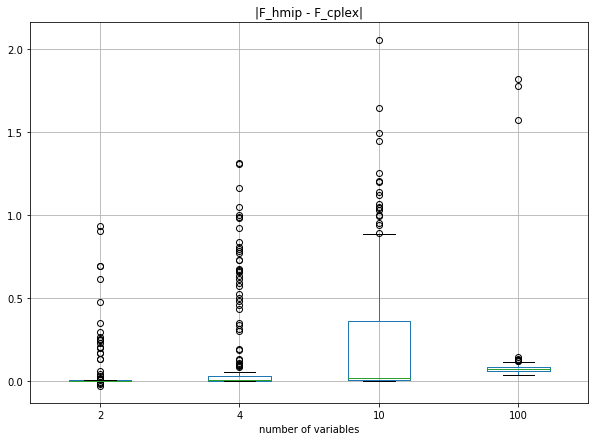

In [122]:
stats_new = pd.DataFrame()
stats_new['2'] = stats_1[stats_1['num_variables'] == 2]['diff'].values / 2 
stats_new['4'] = stats_1[stats_1['num_variables'] == 4]['diff'].values / 4
stats_new['10'] = stats_1[stats_1['num_variables'] == 10]['diff'].values / 10
stats_new['100'] = stats_1[stats_1['num_variables'] == 100]['diff'].values / 100

stats_new.plot.box(figsize=(10, 7), grid=True, title='|F_hmip - F_cplex|')
plt.xlabel('number of variables')

Text(0.5, 0, 'number of variables')

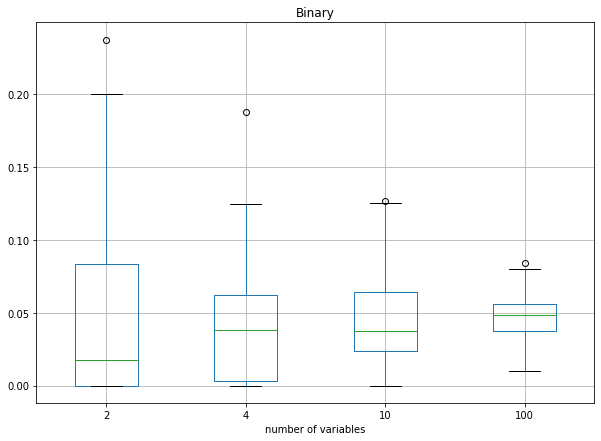

In [123]:
stats_new = pd.DataFrame()
stats_new[2] = stats_1[stats_1['num_variables'] == 2]['binary'].values / 2
stats_new[4] = stats_1[stats_1['num_variables'] == 4]['binary'].values / 4
stats_new[10] = stats_1[stats_1['num_variables'] == 10]['binary'].values / 10
stats_new[100] = stats_1[stats_1['num_variables'] == 100]['binary'].values / 100

stats_new.plot.box(figsize=(10, 7), grid=True, title='Binary')
plt.xlabel('number of variables')

Text(0.5, 0, 'number of variables')

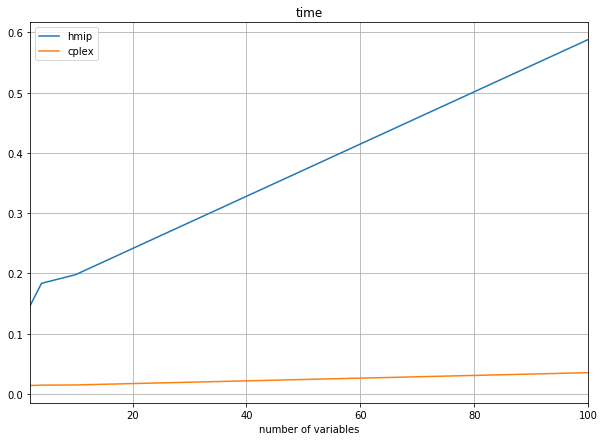

In [124]:
time_hmip = {}
time_hmip[2] = stats_1[stats_1['num_variables'] == 2]['t_hmip'].values.mean() 
time_hmip[4] = stats_1[stats_1['num_variables'] == 4]['t_hmip'].values.mean()
time_hmip[10] = stats_1[stats_1['num_variables'] == 10]['t_hmip'].values.mean()
time_hmip[100] = stats_1[stats_1['num_variables'] == 100]['t_hmip'].values.mean() 

time_hmip = pd.DataFrame.from_dict(time_hmip, orient='index', columns=['hmip'])

time_cplex = {}
time_cplex[2] = stats_1[stats_1['num_variables'] == 2]['t_cplex'].values.mean() 
time_cplex[4] = stats_1[stats_1['num_variables'] == 4]['t_cplex'].values.mean()
time_cplex[10] = stats_1[stats_1['num_variables'] == 10]['t_cplex'].values.mean()
time_cplex[100] = stats_1[stats_1['num_variables'] == 100]['t_cplex'].values.mean() 

time_cplex = pd.DataFrame.from_dict(time_cplex, orient='index', columns=['cplex'])

time = pd.concat([time_cplex, time_hmip], sort=False)

ax = time_hmip.plot(grid=True, figsize=(10, 7), title='time')
time_cplex.plot(ax=ax, figsize=(10, 7), grid=True, title='time')

plt.xlabel('number of variables')

In [98]:
stats_new = pd.DataFrame()
stats_new[2] = stats_1[stats_1['num_variables'] == 2]['norm_eq'].values / 2
stats_new[4] = stats_1[stats_1['num_variables'] == 4]['norm_eq'].values / 4
stats_new[10] = stats_1[stats_1['num_variables'] == 10]['norm_eq'].values / 10

stats_new.plot.box(figsize=(10, 7), grid=True, title='norm_eq')
plt.xlabel('number of variables')

KeyError: 'norm_eq'

In [17]:
stats_new = pd.DataFrame()
stats_new[2] = stats[stats['num_variables'] == 2]['norm_ineq'].values / 2
stats_new[4] = stats[stats['num_variables'] == 4]['norm_ineq'].values / 4
stats_new[10] = stats[stats['num_variables'] == 10]['norm_ineq'].values / 10

stats_new.plot.box(figsize=(10, 7), grid=True, title='norm_ineq')
plt.xlabel('number of variables')

KeyError: 'norm_ineq'

In [179]:
stats_comp = pd.read_csv('solve/stats.csv')
stats_comp

,Unnamed: 0,num_variables,activation_function,absorption_criterion,ascent_stop_criterion,stopping_criterion_type,step_type,max_iterations,direction_type,initial_ascent_type,gamma,theta,f_value,binary,t_hmip,t_cplex,f_cplex
0,0,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-0.133791,0.000000,0.003036,0.020074,-0.133791
1,1,4,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-6.120530,0.000000,0.022927,0.013135,-6.120530
2,2,10,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-3.215577,0.000000,0.019823,0.011996,-3.215577
3,3,100,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-6.360710,2.015588,0.205241,0.027298,-11.555577
4,4,500,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-4886.220097,15.818273,0.703658,0.179066,-4959.791529
5,5,1000,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-4720.075886,41.845221,1.378175,0.877485,-4875.298845


Text(0.5, 0, 'number of variables')

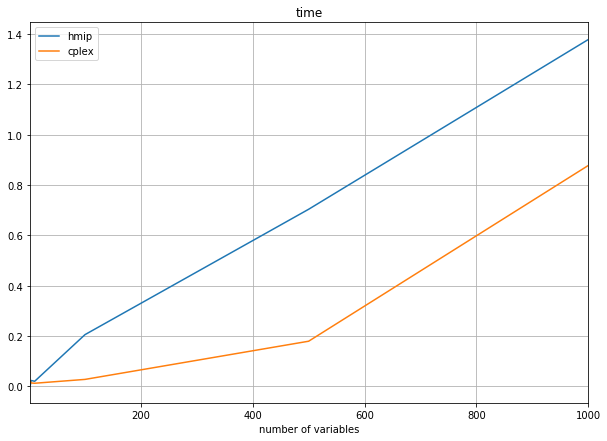

In [180]:
time_hmip = {}
time_hmip[2] = stats_comp[stats_comp['num_variables'] == 2]['t_hmip'].values.mean() 
time_hmip[4] = stats_comp[stats_comp['num_variables'] == 4]['t_hmip'].values.mean()
time_hmip[10] = stats_comp[stats_comp['num_variables'] == 10]['t_hmip'].values.mean()
time_hmip[100] = stats_comp[stats_comp['num_variables'] == 100]['t_hmip'].values.mean() 
time_hmip[500] = stats_comp[stats_comp['num_variables'] == 500]['t_hmip'].values.mean() 
time_hmip[1000] = stats_comp[stats_comp['num_variables'] == 1000]['t_hmip'].values.mean() 

time_hmip = pd.DataFrame.from_dict(time_hmip, orient='index', columns=['hmip'])

time_cplex = {}
time_cplex[2] = stats_comp[stats_comp['num_variables'] == 2]['t_cplex'].values.mean() 
time_cplex[4] = stats_comp[stats_comp['num_variables'] == 4]['t_cplex'].values.mean()
time_cplex[10] = stats_comp[stats_comp['num_variables'] == 10]['t_cplex'].values.mean()
time_cplex[100] = stats_comp[stats_comp['num_variables'] == 100]['t_cplex'].values.mean() 
time_cplex[500] = stats_comp[stats_comp['num_variables'] == 500]['t_cplex'].values.mean() 
time_cplex[1000] = stats_comp[stats_comp['num_variables'] == 1000]['t_cplex'].values.mean() 


time_cplex = pd.DataFrame.from_dict(time_cplex, orient='index', columns=['cplex'])

time = pd.concat([time_cplex, time_hmip], sort=False)

ax = time_hmip.plot(grid=True, figsize=(10, 7), title='time')
time_cplex.plot(ax=ax, figsize=(10, 7), grid=True, title='time')

plt.xlabel('number of variables')